In [29]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import sklearn
from sklearn import model_selection
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold, learning_curve, GridSearchCV
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [3]:
#loading images and their labels
X = np.load('X.npy') # images
Y = np.load('Y.npy') # labels for the images (0 = no IDC, 1 = IDC)

In [26]:
#making sure the data for X crossed over correctly
print(X[:3])

[[[[226 164 206]
   [224 154 196]
   [225 175 211]
   ...
   [240 221 237]
   [232 184 214]
   [243 213 235]]

  [[217 142 188]
   [221 130 179]
   [224 150 196]
   ...
   [227 170 204]
   [229 180 215]
   [236 212 232]]

  [[237 178 212]
   [229 157 199]
   [218 125 175]
   ...
   [221 184 217]
   [190 153 193]
   [227 164 208]]

  ...

  [[217 145 192]
   [214 129 184]
   [212 129 183]
   ...
   [194 122 185]
   [204 143 193]
   [189 129 188]]

  [[218 144 192]
   [213 128 185]
   [208 121 171]
   ...
   [136  79 145]
   [184 111 174]
   [188 112 176]]

  [[212 125 181]
   [211 136 181]
   [220 162 206]
   ...
   [127  90 152]
   [213 167 202]
   [215 180 211]]]


 [[[219 150 197]
   [217 158 201]
   [228 173 205]
   ...
   [198 165 199]
   [230 204 224]
   [231 193 221]]

  [[223 150 195]
   [222 140 192]
   [213 133 186]
   ...
   [218 143 193]
   [218 148 197]
   [215 131 185]]

  [[203 125 176]
   [218 143 192]
   [227 163 199]
   ...
   [210 137 188]
   [203 121 177]
   [192 124

In [25]:
#making sure the data for Y crosssed over correctly
print(Y[:5])

[0 0 0 0 0]


In [5]:
#total number of images 
print('Total number of images: {}'.format(len(X)))

Total number of images: 5547


In [10]:
#total number of negative IDC images
print('Number of negative IDC Images: {}'.format(np.sum(Y==0)))

Number of IDC negative Images: 2759


In [11]:
#total number of positive IDC images
print('Number of positive IDC Images: {}'.format(np.sum(Y==1)))

Number of IDC positive Images: 2788


In [12]:
#shape of the images
print('Image shape (Width, Height, Channels): {}'.format(X[0].shape))

Image shape (Width, Height, Channels): (50, 50, 3)


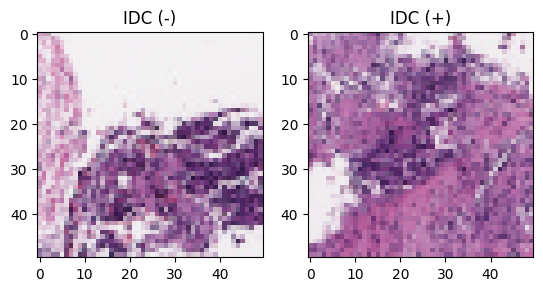

In [15]:
imgs0 = X[Y==0]
imgs1 = X[Y==1] 

def plotOne(a,b):
    """
    Plot one numpy array
    """
    plt.subplot(1,2,1)
    plt.title('IDC (-)')
    plt.imshow(a[100])
    plt.subplot(1,2,2)
    plt.title('IDC (+)')
    plt.imshow(b[100])
plotOne(imgs0, imgs1) 

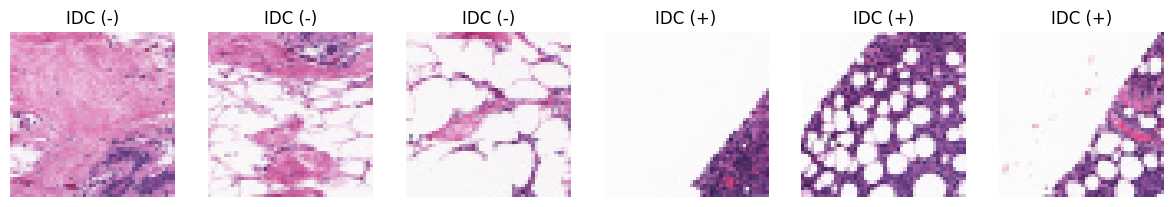

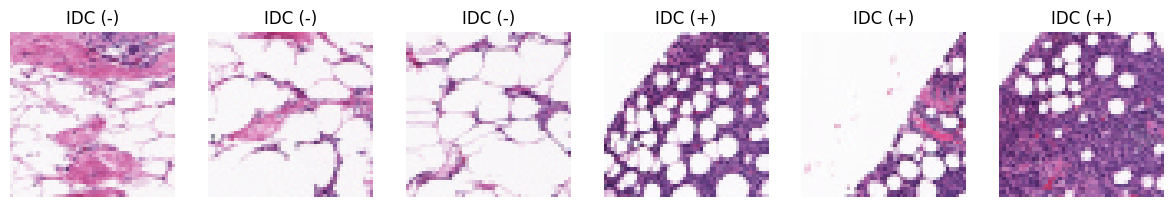

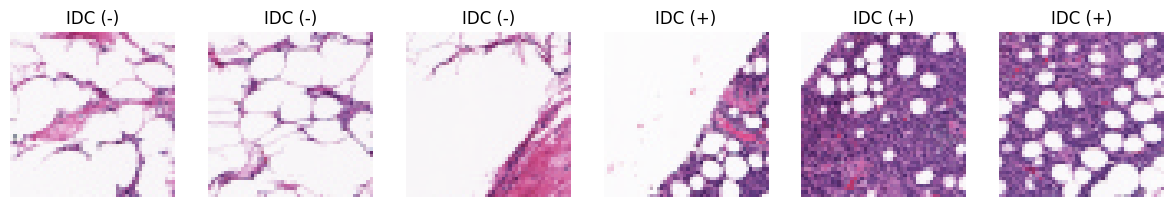

In [16]:
def plotTwo(a,b): 
    """
    Plot a bunch of numpy arrays sorted by label
    """
    for row in range(3):
        plt.figure(figsize=(20, 10))
        for col in range(3):
            plt.subplot(1,8,col+1)
            plt.title('IDC (-)')
            plt.imshow(a[row+col])
            plt.axis('off')       
            plt.subplot(1,8,col+4)
            plt.title('IDC (+)')
            plt.imshow(b[row+col])
            plt.axis('off')
plotTwo(imgs0, imgs1) 

In [34]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# Reduce Sample Size
x_train = x_train[0:30000] 
y_train = y_train[0:30000]
x_test = x_test[0:30000] 
y_test = y_test[0:30000]

# Normalize the data
x_train = x_train / 256.0
x_test = x_test / 256.0

print("Training Data Shape:", x_train.shape)
print("Testing Data Shape:", x_test.shape)

Training Data Shape: (4437, 50, 50, 3)
Testing Data Shape: (1110, 50, 50, 3)


0


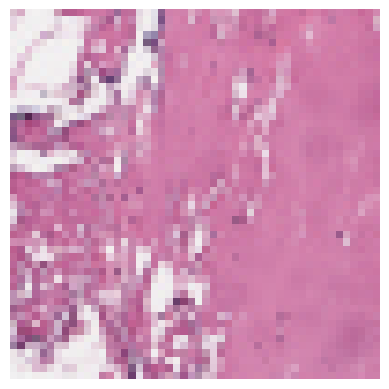

1


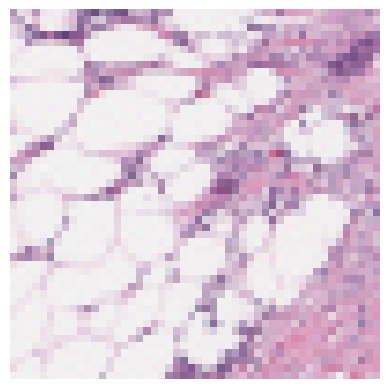

0


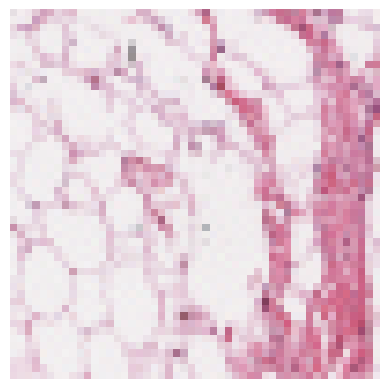

1


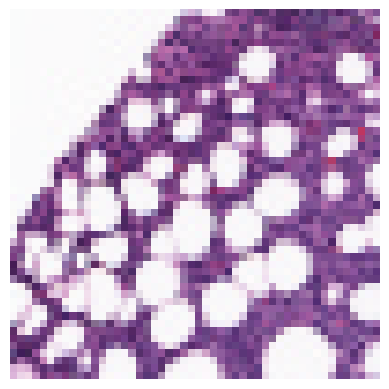

1


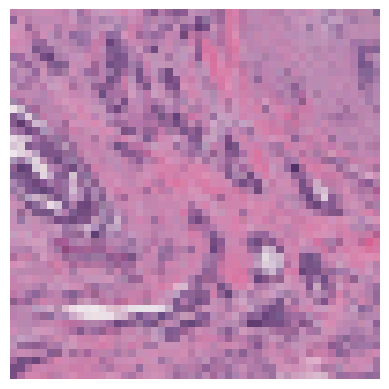

In [39]:
#displaying the first five images in the training set along with the labels
for i in range(5):
    plt.imshow(x_train[i], cmap='gray'), plt.axis("off")
    print(y_train[i])
    plt.show()

In [36]:
#printing the data to show that it's now 0-1
print(x_train[:3])

[[[[0.859375   0.76171875 0.8125    ]
   [0.84375    0.67578125 0.7734375 ]
   [0.9453125  0.9296875  0.9375    ]
   ...
   [0.78515625 0.4140625  0.6015625 ]
   [0.80078125 0.453125   0.625     ]
   [0.8203125  0.53515625 0.6875    ]]

  [[0.90234375 0.8359375  0.88671875]
   [0.93359375 0.8984375  0.9140625 ]
   [0.94140625 0.9375     0.94140625]
   ...
   [0.80078125 0.46484375 0.62890625]
   [0.8046875  0.44921875 0.63671875]
   [0.83984375 0.6875     0.7578125 ]]

  [[0.91015625 0.83203125 0.875     ]
   [0.953125   0.94140625 0.9375    ]
   [0.93359375 0.9375     0.93359375]
   ...
   [0.8203125  0.4765625  0.6484375 ]
   [0.7734375  0.43359375 0.609375  ]
   [0.8203125  0.62890625 0.74609375]]

  ...

  [[0.92578125 0.90234375 0.9140625 ]
   [0.9140625  0.8984375  0.91015625]
   [0.84375    0.77734375 0.84765625]
   ...
   [0.80078125 0.52734375 0.6875    ]
   [0.80859375 0.51171875 0.671875  ]
   [0.80859375 0.51171875 0.6796875 ]]

  [[0.93359375 0.9296875  0.93359375]
   [0.9